In [4]:
import pandas as pd
import numpy as np
import matplotlib as plt
import os

In [5]:
pd.read_csv('/Users/samuelmahjouri/Desktop/dsc/dsc106/dsc106project3/project3data/Data/S1/Final/ACC.csv')

,1544027337.000000,1544027337.000000,1544027337.000000.1
0,32.0,32.0,32.0
1,-3.0,65.0,6.0
2,-3.0,65.0,6.0
3,-3.0,65.0,6.0
4,-3.0,65.0,6.0
...,...,...,...
748682,-24.0,42.0,42.0
748683,-24.0,42.0,43.0
748684,-25.0,42.0,42.0
748685,-24.0,42.0,44.0


In [9]:
def create_hr_eda_table_sorted_by_student(base_path):
    data = {
        "Student": [],
        "mid1HR": [],
        "mid2HR": [],
        "finalHR": [],
        "mid1ST": [],
        "mid2ST": [],
        "finalST": []
    }
    exam_dict = {
        "Midterm 1": ("mid1HR", "mid1ST"),
        "Midterm 2": ("mid2HR", "mid2ST"),
        "Final": ("finalHR", "finalST")
    }
    student_folders = [
        d for d in os.listdir(base_path)
        if d.startswith("S") and os.path.isdir(os.path.join(base_path, d))
    ]
    student_folders = sorted(student_folders, key=lambda x: int(x[1:]))
    for student_folder in student_folders:
        student_path = os.path.join(base_path, student_folder)
        row_data = {
            "Student": student_folder,
            "mid1HR": None,
            "mid2HR": None,
            "finalHR": None,
            "mid1ST": None,
            "mid2ST": None,
            "finalST": None
        }


        for exam_name, (hr_col, eda_col) in exam_dict.items():
            exam_path = os.path.join(student_path, exam_name)
            hr_file_path = os.path.join(exam_path, "HR.csv")
            if os.path.exists(hr_file_path):
                try:
                
                    hr_data = pd.read_csv(hr_file_path, header=None, skiprows=2)
                    avg_hr = hr_data.mean().iloc[0]
                    row_data[hr_col] = avg_hr
                except Exception as e:
                    print(f"Error reading {hr_file_path} for {student_folder}: {e}")
                    row_data[hr_col] = None

            eda_file_path = os.path.join(exam_path, "TEMP.csv")
            if os.path.exists(eda_file_path):
                try:
                    eda_data = pd.read_csv(eda_file_path, header=None, skiprows=2)
                    avg_eda = eda_data.mean().iloc[0]
                    row_data[eda_col] = avg_eda
                except Exception as e:
                    print(f"Error reading {eda_file_path} for {student_folder}: {e}")
                    row_data[eda_col] = None

        for key in row_data:
            data[key].append(row_data[key])
    df = pd.DataFrame(data)
    return df


base_path = "/Users/samuelmahjouri/Desktop/dsc/dsc106/dsc106project3/project3data/Data"
hr_eda_table = create_hr_eda_table_sorted_by_student(base_path)
hr_eda_table

,Student,mid1HR,mid2HR,finalHR,mid1ST,mid2ST,finalST
0,S1,103.113747,110.994480,106.121509,26.418379,27.129208,26.184411
1,S2,111.459520,106.651489,119.901866,28.694811,27.873338,28.182078
2,S3,105.683180,97.412395,104.510099,26.730124,28.074951,26.509118
3,S4,110.635803,94.808198,92.670820,25.405085,26.209634,28.376879
4,S5,108.256690,113.318483,95.404440,26.806748,28.219406,30.185718
5,S6,107.045593,104.692952,103.860285,27.983746,26.925980,27.047806
6,S7,112.383056,98.947397,101.228184,25.533605,24.881287,25.964929
7,S8,113.672423,102.700564,102.171506,27.069354,28.509379,29.274745
8,S9,108.354602,103.106930,86.703446,26.369618,27.855815,30.808438
9,S10,106.602260,107.400837,105.473729,26.022988,26.061580,26.331471


In [11]:
import os
import pandas as pd
import numpy as np

def create_hr_st_dataframes_for_students(base_path):
    """
    Reads all HR and ST data (without averaging) for each exam of each student.
    Returns a dictionary of DataFrames, keyed by student folder name.
    Each DataFrame has 6 columns: mid1HR, mid1ST, mid2HR, mid2ST, finalHR, finalST.
    """

    # We will store one DataFrame per student in this dictionary:
    #    student_dataframes["S1"] -> DataFrame with columns [mid1HR, mid1ST, mid2HR, mid2ST, finalHR, finalST]
    student_dataframes = {}

    # Map exam folder names to the column names we'll use
    exam_dict = {
        "Midterm 1": ("mid1HR", "mid1ST"),
        "Midterm 2": ("mid2HR", "mid2ST"),
        "Final": ("finalHR", "finalST")
    }

    # Identify all student folders starting with "S" and sort them numerically
    student_folders = [
        d for d in os.listdir(base_path)
        if d.startswith("S") and os.path.isdir(os.path.join(base_path, d))
    ]
    student_folders = sorted(student_folders, key=lambda x: int(x[1:]))

    # Loop through each student
    for student_folder in student_folders:
        student_path = os.path.join(base_path, student_folder)

        # Initialize lists to store the series for each column
        # Each entry in row_data will be a Python list of raw samples
        row_data = {
            "mid1HR":  [],
            "mid2HR":  [],
            "finalHR": [],
            "mid1ST":  [],
            "mid2ST":  [],
            "finalST": []
        }

        # For each exam, read the full HR.csv and TEMP.csv (ST) data
        for exam_name, (hr_col, st_col) in exam_dict.items():
            exam_path = os.path.join(student_path, exam_name)

            # --- HR.csv ---
            hr_file_path = os.path.join(exam_path, "HR.csv")
            if os.path.exists(hr_file_path):
                try:
                    hr_data = pd.read_csv(hr_file_path, header=None, skiprows=2)
                    # Assuming one column of HR values
                    hr_list = hr_data.iloc[:, 0].tolist()
                    row_data[hr_col] = hr_list
                except Exception as e:
                    print(f"Error reading {hr_file_path} for {student_folder}: {e}")
                    row_data[hr_col] = []
            else:
                row_data[hr_col] = []

            # --- TEMP.csv (Skin Temperature) ---
            st_file_path = os.path.join(exam_path, "TEMP.csv")
            if os.path.exists(st_file_path):
                try:
                    st_data = pd.read_csv(st_file_path, header=None, skiprows=2)
                    # Assuming one column of skin-temp values
                    st_list = st_data.iloc[:, 0].tolist()
                    row_data[st_col] = st_list
                except Exception as e:
                    print(f"Error reading {st_file_path} for {student_folder}: {e}")
                    row_data[st_col] = []
            else:
                row_data[st_col] = []

        # At this point, row_data contains 6 lists, each a different length.
        # We will pad them to the same length and create a DataFrame with 6 columns.

        # Find the maximum length among the 6 lists
        max_len = max(len(lst) for lst in row_data.values())

        # Pad each list with NaN to match max_len
        for col_name in row_data:
            current_len = len(row_data[col_name])
            if current_len < max_len:
                # Extend the list with NaNs
                row_data[col_name].extend([np.nan] * (max_len - current_len))

        # Now convert this dictionary into a DataFrame
        df = pd.DataFrame(row_data)

        # Optionally, you could add a 'time' column or a numeric index, etc.
        # For simplicity, we just keep it as is.

        # Store this DataFrame in the dictionary, keyed by student folder
        student_dataframes[student_folder] = df

    return student_dataframes


# -----------------
# Example usage:
# -----------------
base_path = "/Users/samuelmahjouri/Desktop/dsc/dsc106/dsc106project3/project3data/Data"
student_dfs = create_hr_st_dataframes_for_students(base_path)

# Now student_dfs["S1"] is a DataFrame for student S1
# with columns: [mid1HR, mid1ST, mid2HR, mid2ST, finalHR, finalST].
# Similarly for "S2", "S3", ... etc.


In [64]:
student_dfs['S1']

,mid1HR,mid2HR,finalHR,mid1ST,mid2ST,finalST
0,84.00,97.00,116.00,22.51,21.79,21.89
1,85.00,74.00,82.50,22.51,21.79,21.89
2,86.00,86.33,96.33,22.51,21.79,21.89
3,86.75,78.50,86.25,22.51,21.79,21.89
4,87.40,86.80,98.60,22.51,21.79,21.89
...,...,...,...,...,...,...
93579,NaN,NaN,NaN,NaN,NaN,26.67
93580,NaN,NaN,NaN,NaN,NaN,26.67
93581,NaN,NaN,NaN,NaN,NaN,26.67
93582,NaN,NaN,NaN,NaN,NaN,26.67


In [71]:
student_names = student_dfs.keys()

#pd.DataFrame(columns=['second','hr'],student_dfs['S1']['mid1HR'].dropna()) #.shape[0] / 60

student_dfs['S1']['mid1HR'].dropna().shape[0] / 2 / 60

93.075

In [73]:
student_dfs['S1']

,mid1HR,mid2HR,finalHR,mid1ST,mid2ST,finalST
0,84.00,97.00,116.00,22.51,21.79,21.89
1,85.00,74.00,82.50,22.51,21.79,21.89
2,86.00,86.33,96.33,22.51,21.79,21.89
3,86.75,78.50,86.25,22.51,21.79,21.89
4,87.40,86.80,98.60,22.51,21.79,21.89
...,...,...,...,...,...,...
93579,NaN,NaN,NaN,NaN,NaN,26.67
93580,NaN,NaN,NaN,NaN,NaN,26.67
93581,NaN,NaN,NaN,NaN,NaN,26.67
93582,NaN,NaN,NaN,NaN,NaN,26.67


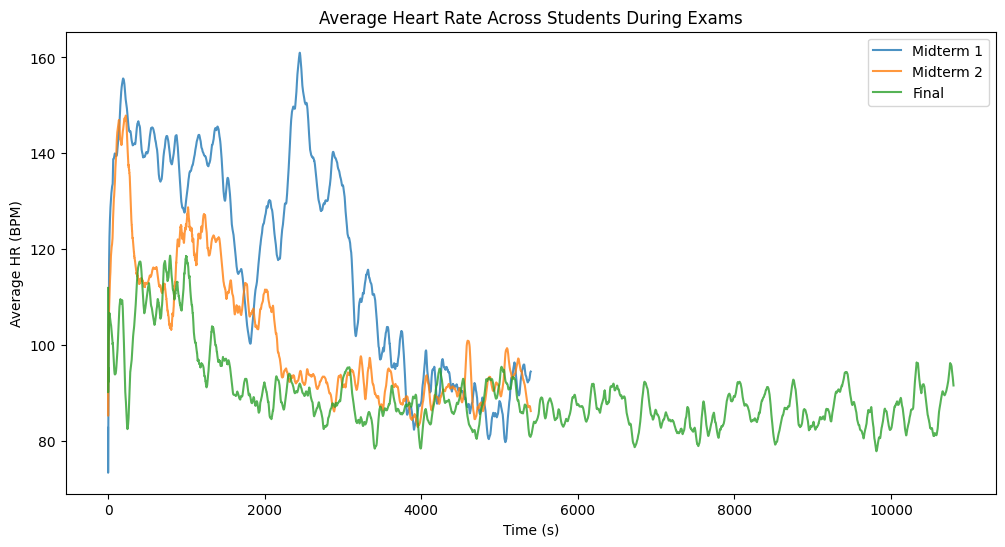

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def compute_avg_hr_per_second(student_dfs):
    """
    Computes separate DataFrames for Midterm 1, Midterm 2, and Final, 
    where each contains the average heart rate per second across students.
    
    Args:
        student_dfs (dict): Dictionary where keys are student IDs, and values are DataFrames of HR data.
    
    Returns:
        tuple of three DataFrames: (midterm1_df, midterm2_df, final_df)
    """

    # Define exam durations in seconds
    exam_durations = {
        "mid1HR": 5400,   # 1.5 hours
        "mid2HR": 5400,   
        "finalHR": 10800  # 3 hours
    }

    # Mapping exam column names to readable names
    exam_mapping = {
        "mid1HR": "Midterm 1",
        "mid2HR": "Midterm 2",
        "finalHR": "Final"
    }

    # Initialize dictionaries to hold data for each exam
    avg_hr_data = {}

    for exam, duration in exam_durations.items():
        avg_hr_data[exam_mapping[exam]] = {
            "Time (s)": np.arange(duration),
            "HR": np.zeros(duration),
            "Count": np.zeros(duration)  # Track number of students contributing at each second
        }

    # Process each student's HR data
    for student, df in student_dfs.items():
        for exam, duration in exam_durations.items():
            if exam in df.columns:
                exam_key = exam_mapping[exam]  # Get readable exam name
                hr_values = df[exam].values  # Extract HR values

                # Limit processing to the actual duration of the exam
                valid_length = min(len(hr_values), duration)
                non_nan_mask = ~np.isnan(hr_values[:valid_length])

                # Accumulate HR values
                avg_hr_data[exam_key]["HR"][:valid_length][non_nan_mask] += hr_values[:valid_length][non_nan_mask]
                avg_hr_data[exam_key]["Count"][:valid_length][non_nan_mask] += 1  # Count valid HR readings

    # Compute the mean HR per second for each exam
    dfs = {}
    for exam in exam_mapping.values():
        avg_hr_data[exam]["HR"] = np.where(avg_hr_data[exam]["Count"] > 0,
                                           avg_hr_data[exam]["HR"] / avg_hr_data[exam]["Count"],
                                           np.nan)  # Avoid division by zero

        # Store as a Pandas DataFrame
        dfs[exam] = pd.DataFrame({
            "Time (s)": avg_hr_data[exam]["Time (s)"],
            "HR": avg_hr_data[exam]["HR"]
        })

    return dfs["Midterm 1"], dfs["Midterm 2"], dfs["Final"]

# Example Usage:
midterm1_df, midterm2_df, final_df = compute_avg_hr_per_second(student_dfs)

# Plot each exam separately
plt.figure(figsize=(12, 6))
plt.plot(midterm1_df["Time (s)"], midterm1_df["HR"], label="Midterm 1", alpha=0.8)
plt.plot(midterm2_df["Time (s)"], midterm2_df["HR"], label="Midterm 2", alpha=0.8)
plt.plot(final_df["Time (s)"], final_df["HR"], label="Final", alpha=0.8)
plt.xlabel("Time (s)")
plt.ylabel("Average HR (BPM)")
plt.title("Average Heart Rate Across Students During Exams")
plt.legend()
plt.show()


In [142]:
#midterm2_df['HR'][0:50]# [226] #.idxmax()#[5398:5400].max() #[5375:5400] #.max()

In [115]:
compute_avg_hr_per_second(student_dfs)

(      Time (s)      HR
 0            0  82.700
 1            1  73.350
 2            2  77.367
 3            3  78.625
 4            4  80.160
 ...        ...     ...
 5395      5395  94.300
 5396      5396  94.370
 5397      5397  94.419
 5398      5398  94.431
 5399      5399  94.455
 
 [5400 rows x 2 columns],
       Time (s)      HR
 0            0  94.300
 1            1  85.250
 2            2  90.966
 3            3  93.950
 4            4  96.760
 ...        ...     ...
 5395      5395  86.647
 5396      5396  86.549
 5397      5397  86.445
 5398      5398  86.348
 5399      5399  86.208
 
 [5400 rows x 2 columns],
        Time (s)       HR
 0             0  111.900
 1             1   90.150
 2             2   95.334
 3             3   92.225
 4             4   95.800
 ...         ...      ...
 10795     10795   92.136
 10796     10796   91.965
 10797     10797   91.856
 10798     10798   91.728
 10799     10799   91.554
 
 [10800 rows x 2 columns])